In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import binom

from graph_generators import generate_random_graph, generate_watts_strogatz, generate_barabasi_albert_graph

# Random Graph

In [2]:
n, p = 2000, 0.2

G = generate_random_graph(n, p)

#### Number of nodes

In [3]:
len(G.vertList)

2000

#### Number of edges

In [4]:
len(G.getEdges())

797770

#### Average degree

In [5]:
degrees = list(G.getDegrees().values())

np.mean(degrees)

398.885

In [6]:
np.std(degrees)

17.491820231182345

#### Frequency plot

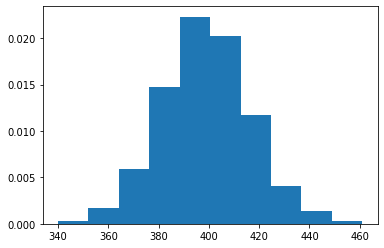

In [7]:
plt.hist(degrees, density=True)
plt.show()

#### Model distribution

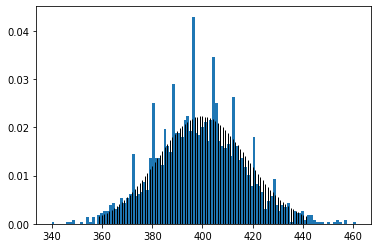

In [8]:
plt.hist(degrees, density=True, bins=len(set(degrees)))

rv = binom(n, p)
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
plt.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1)

plt.show()

# Watts-Strogatz

In [9]:
n, k, p = 2000, 40, 0.8

G = generate_watts_strogatz(n, k, p)

#### Number of nodes

In [10]:
len(G.vertList)

2000

#### Number of edges

In [11]:
len(G.getEdges())

78738

#### Average degree

In [12]:
degrees = list(G.getDegrees().values())

np.mean(degrees)

39.369

In [13]:
np.std(degrees)

5.061406820242767

#### Frequency plot

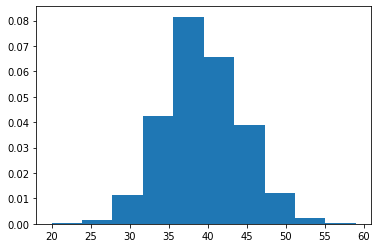

In [14]:
plt.hist(degrees, density=True)
plt.show()

# Barabasi Albert

In [15]:
n, m = 5000, 30

G = generate_barabasi_albert_graph(n, m)

#### Number of nodes

In [16]:
len(G.vertList)

5000

#### Number of edges

In [17]:
len(G.getEdges())

10810

#### Average degree

In [18]:
degrees = list(G.getDegrees().values())

np.mean(degrees)

2.162

In [19]:
np.std(degrees)

8.157950477908038

#### Frequency plot

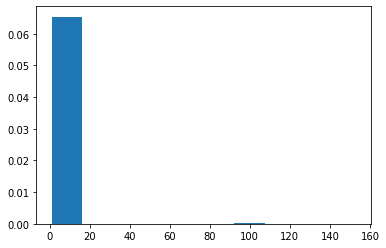

In [20]:
plt.hist(degrees, density=True)
plt.show()

#### Degree distribution

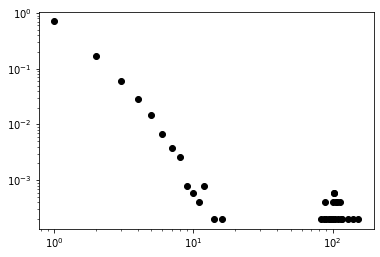

In [21]:
dist = np.bincount(degrees)/np.sum(np.bincount(degrees))
deg = np.arange(len(dist))

plt.loglog(deg, dist, 'ko')
plt.show()